In [97]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [98]:
database = pd.read_csv('database.csv')
database.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,79,oral_cavity_cancer,12.259970,7.822784,7.076852,9.932529,6.079321,8.884615,7.078590,6.375017,...,14.097388,13.808292,14.879530,14.770789,6.277723,5.492216,4.872947,4.504117,5.058785,4.959956
1,80,oral_cavity_cancer,12.089249,7.754616,7.640473,10.528756,5.600609,9.038594,7.191701,6.505015,...,14.150997,13.975202,14.868461,14.710410,6.056832,5.809288,4.551575,4.536802,5.166772,5.218432
2,81,oral_cavity_cancer,12.253493,8.331198,6.980443,9.786068,5.357674,7.671959,6.878982,6.686758,...,13.171790,12.663488,14.375815,14.229668,5.902731,5.552099,4.660518,4.428401,4.990019,4.845970
3,82,oral_cavity_cancer,12.784522,8.175401,7.303593,9.868314,5.524533,7.802572,6.849571,6.628684,...,13.348310,12.854595,14.562390,14.354983,5.964846,5.588120,4.667251,4.555028,5.090857,4.773182
4,83,oral_cavity_cancer,12.594939,7.766172,8.706035,9.887563,5.529864,8.735436,6.943179,6.550663,...,13.820435,13.565086,14.817541,14.686170,5.594160,5.640937,4.492807,4.503870,4.920595,4.946553


(array([74.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

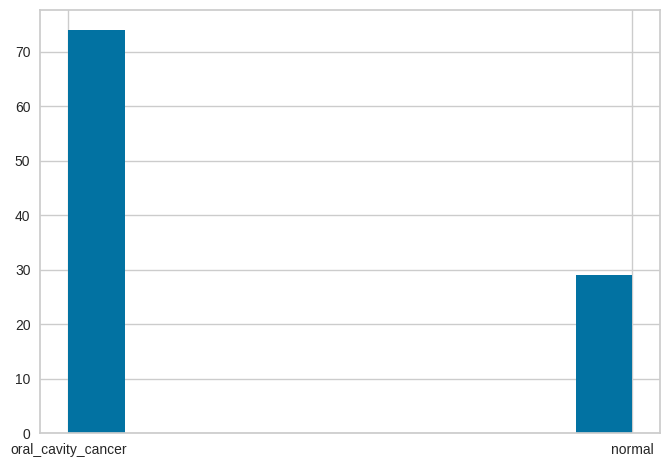

In [99]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [100]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.27, random_state=50)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 54675), (28, 54675), (75,), (28,))

In [102]:
y_train.value_counts(), y_test.value_counts()

(oral_cavity_cancer    52
 normal                23
 Name: type, dtype: int64,
 oral_cavity_cancer    22
 normal                 6
 Name: type, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [103]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 20157 (0.652958)
2. feature 26113 (0.241451)
3. feature 42232 (0.105591)
4. feature 18220 (0.000000)
5. feature 18230 (0.000000)
6. feature 18229 (0.000000)
7. feature 18228 (0.000000)
8. feature 18227 (0.000000)
9. feature 18226 (0.000000)
10. feature 18225 (0.000000)
11. feature 18224 (0.000000)
12. feature 18223 (0.000000)
13. feature 18222 (0.000000)
14. feature 18221 (0.000000)
15. feature 18219 (0.000000)
16. feature 18232 (0.000000)
17. feature 18218 (0.000000)
18. feature 18217 (0.000000)
19. feature 18216 (0.000000)
20. feature 18215 (0.000000)
21. feature 18214 (0.000000)
22. feature 18213 (0.000000)
23. feature 18212 (0.000000)
24. feature 18211 (0.000000)
25. feature 18210 (0.000000)
26. feature 18209 (0.000000)
27. feature 18231 (0.000000)
28. feature 54674 (0.000000)
29. feature 18259 (0.000000)
30. feature 18234 (0.000000)
31. feature 18257 (0.000000)
32. feature 18256 (0.000000)
33. feature 18255 (0.000000)
34. feature 18254 (0.000000)
35. fe

[Text(0.5, 0.8333333333333334, '210776_x_at <= 9.205\nentropy = 0.889\nsamples = 75\nvalue = [23, 52]\nclass = Tumor'),
 Text(0.25, 0.5, '216823_at <= 7.182\nentropy = 0.619\nsamples = 26\nvalue = [22, 4]\nclass = Normal'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Tumor'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = Normal'),
 Text(0.75, 0.5, '232979_at <= 5.501\nentropy = 0.144\nsamples = 49\nvalue = [1, 48]\nclass = Tumor'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Normal'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 48\nvalue = [0, 48]\nclass = Tumor')]

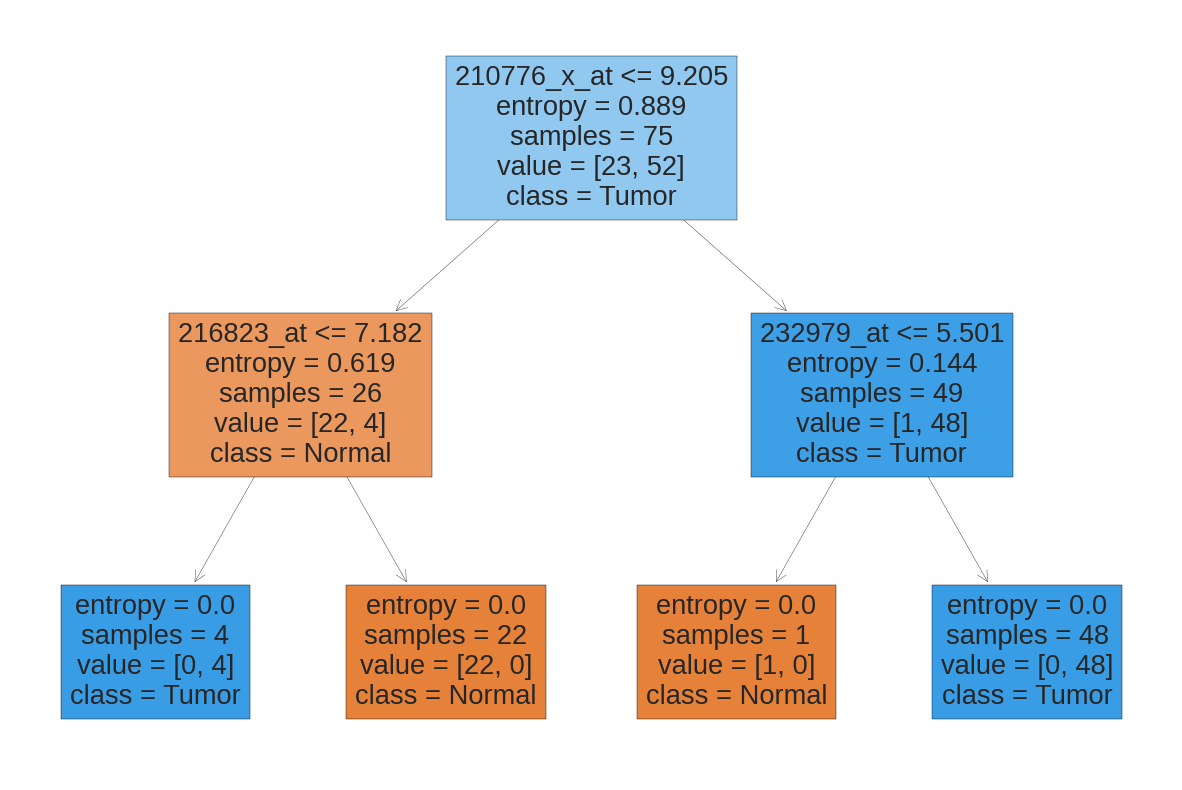

In [105]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
tree.plot_tree(clf, class_names=['Normal', 'Tumor'], filled=True, feature_names=X_train.columns)

In [106]:
predictions = clf.predict(X_test)
predictions

array(['oral_cavity_cancer', 'oral_cavity_cancer', 'normal',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'normal', 'oral_cavity_cancer', 'normal', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'normal',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer'],
      dtype=object)

In [107]:
y_test

83                normal
17    oral_cavity_cancer
99                normal
59    oral_cavity_cancer
44    oral_cavity_cancer
81                normal
42    oral_cavity_cancer
21    oral_cavity_cancer
25    oral_cavity_cancer
55    oral_cavity_cancer
34    oral_cavity_cancer
56    oral_cavity_cancer
75                normal
69    oral_cavity_cancer
95                normal
16    oral_cavity_cancer
40    oral_cavity_cancer
61    oral_cavity_cancer
58    oral_cavity_cancer
15    oral_cavity_cancer
63    oral_cavity_cancer
18    oral_cavity_cancer
53    oral_cavity_cancer
3     oral_cavity_cancer
80                normal
12    oral_cavity_cancer
8     oral_cavity_cancer
38    oral_cavity_cancer
Name: type, dtype: object

In [108]:
from sklearn.metrics import accuracy_score, classification_report

In [109]:
accuracy_score(y_test, predictions)

0.9285714285714286

In [110]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9285714285714286

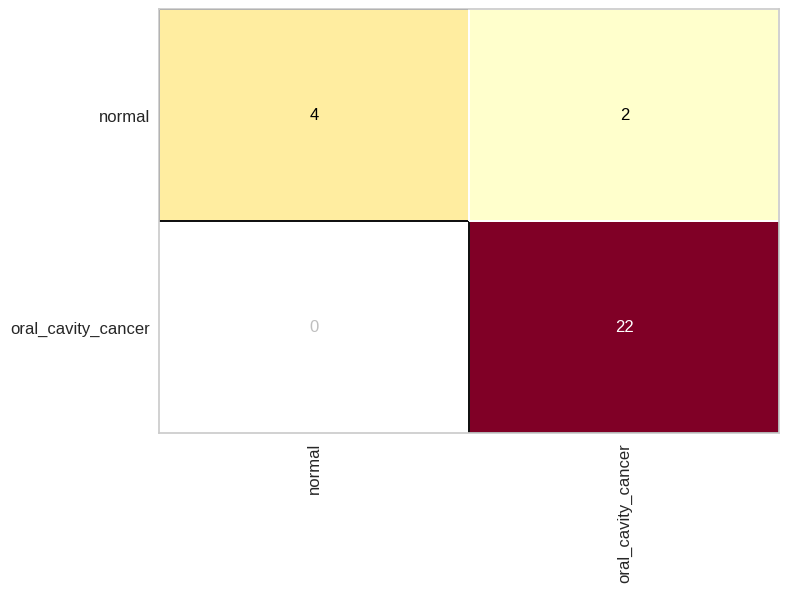

In [111]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [112]:
print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

            normal       1.00      0.67      0.80         6
oral_cavity_cancer       0.92      1.00      0.96        22

          accuracy                           0.93        28
         macro avg       0.96      0.83      0.88        28
      weighted avg       0.93      0.93      0.92        28

